MLI Module 4 Assignment 1, Lukas Zbinden

see Module 4 - Lecture 17 - Regularisation and Optimisation.pdf on L1 and L2

In [1]:
import pandas as pd # data frames
import numpy as np

In [2]:
# read data
df = pd.read_csv("MLI Data Assignment 1.csv", index_col='year')
df.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
year,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888,3.365
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449,3.261
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(43870, 10)

In [4]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [5]:
# remove all null values if any?
df.isnull().sum()[df.isnull().sum() != 0]

qr        21935
roe       21935
wcoa      21935
reoa      21935
eoa       21935
edr       21935
dd        21935
sr        21935
vol       21935
return    21935
dtype: int64

In [6]:
# drop all rows with NaN/null values
df = df.dropna(axis=0)
# check again
print(df.isnull().sum()[df.isnull().sum() != 0])
print(df.shape)

Series([], dtype: int64)
(21935, 10)


In [8]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21935 entries, 1985.0 to 2017.0
Data columns (total 10 columns):
qr        21935 non-null float64
roe       21935 non-null float64
wcoa      21935 non-null float64
reoa      21935 non-null float64
eoa       21935 non-null float64
edr       21935 non-null float64
dd        21935 non-null float64
sr        21935 non-null float64
vol       21935 non-null float64
return    21935 non-null float64
dtypes: float64(10)
memory usage: 1.8 MB


In [10]:
df.index = df.index.astype(int)

In [11]:
# defining vars
input_vars = ["qr", "roe", "wcoa", "reoa", "eoa", "edr", "dd", "sr", "vol"]
target = ["return"]

In [12]:
# have a look at the 9 independent variables
X = df.drop(labels=target, axis=1)
X.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol
year,,,,,,,,,
1985,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888
1985,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449
1985,0.167489,0.009445,0.494797,0.185266,0.138259,15.030330,0.171042,0.477294,4.755013
1985,0.049812,0.016664,0.321690,0.114644,0.105986,10.288281,1.109971,2.946292,0.678819
1985,0.926230,0.064134,0.689753,0.170997,0.145380,11.486287,1.360837,2.831762,0.679110


In [13]:
# check out the dependent variable
y = df.drop(labels=input_vars, axis=1)
y.head()

,return
year,
1985,3.365
1985,3.261
1985,2.270
1985,2.000
1985,1.923


In [14]:
#  let's make an experiment and automatically detect outliers by means of IsolationForest
import time
from sklearn.ensemble import IsolationForest
start = time.time()
    
If = IsolationForest()
If.fit(X) 
y_pred = If.predict(X)

np.count_nonzero(y_pred == -1)

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


2194

In [15]:
hist = np.histogram(y_pred, bins=2)
print(f"#Outliers: {hist[0][0]}\n#Inliers: {hist[0][1]}")

#Outliers: 2194
#Inliers: 19741


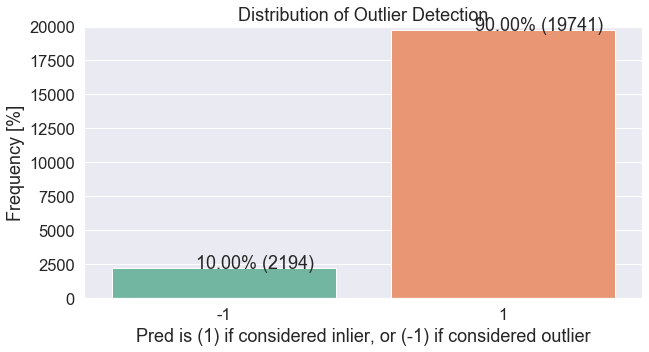

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x = y_pred ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=round(y_pred.shape[0], -len(str(y_pred.shape[0]))+1))
for p in ax.patches:
    ax.annotate('{:.2f}% ({})'.format(100*p.get_height()/len(y_pred), p.get_height()), 
                (p.get_x()+ 0.3, p.get_height()+10))

plt.title('Distribution of Outlier Detection')
plt.xlabel('Pred is (1) if considered inlier, or (-1) if considered outlier')
plt.ylabel('Frequency [%]')
plt.show()

From the plot above we can see that about 10% of the data is considered outlier by the anomaly detection model IsolationForest. We will run experiments with both the entire dataset and just the inlier dataset as determined by the IsolationForest.

In [18]:
# remove outliers from data
df_wo_outliers = df[y_pred == 1]
df_wo_outliers.shape

(19741, 10)

In [176]:
# define multiple linear regression models:
# 'linReg': multiple linear regression without regularization
# 'lasso': multiple linear regression with L1 regularization
# 'ridge': multiple linear regression with L2 regularization
# 'elnet': multiple linear regression with Elastic Net (=combined L1 and L2) regularization 


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

num_linspace = 8
models_and_parameters = {
    'linReg': (LinearRegression(), 
              {}),  # has no params
    'lasso': (Lasso(), 
              {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}),  # constant that multiplies the L1 term
    'ridge': (Ridge(), 
              {'alpha': [1, 5, 10, 20, 40, 80, 160, 320, 640, 1280]}),  # constant that multiplies the L2 term
    'elnet': (ElasticNet(), 
              # 'alpha': constant that multiplies the penalty terms
              {'alpha': [1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10],  
               # 'l1_ratio': the mixing parameter, with 0 <= l1_ratio <= 1.
               # if 0 < l1_ratio < 1, then the penalty is a combination of L1 and L2.
               # if l1_ratio = 1, then L1 penalty. If l1_ratio = 0, then L2 penaltyy.
               'l1_ratio': np.linspace(0.0001, 0.9999, num=num_linspace)})
            
}

In [179]:
mean_mse_model = pd.DataFrame(index=[0], columns=["Model", "Time", "MSE", "Estimator", "alpha", "'l1_ratio'"])

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics
from time import time

def fit_predict_model(models_and_parameters_dict):
    #######################################
    # configuration
    REPEAT = 1
    SEED = 12345  # will ensure different results on each iteration
    K_FOLD_NUM = 5
    REFIT_METRIC = 'MSE'
    #######################################

    mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

    # use nested cross-validation for grid search and validation
    # creates 5 folds for estimating generalization error, repeat 
    outer_folds = RepeatedKFold(n_repeats=REPEAT, n_splits=K_FOLD_NUM, random_state=SEED)

    # when we train on a certain fold, we use a second cross-validation
    # split in order to choose hyperparameters
    inner_folds = KFold(n_splits=K_FOLD_NUM, random_state=SEED, shuffle=True)

    i, z, innercv_results, inner_best_model = 0, 0, {}, {}
    df_outer_results = pd.DataFrame(index=[0], columns=["Model", "Time", "MSE", "Estimator", "alpha", 'l1_ratio'])

    X_arr, y_arr = X.values, y.values

    # outer loop
    for (out_train, out_test) in outer_folds.split(X_arr, y_arr):
        print(f"Repetition {int(i / K_FOLD_NUM) + 1} Fold {i % K_FOLD_NUM + 1}")
        i += 1  # iteration
        # separation: train, test
        Xtrain, Xtest = X_arr[out_train], X_arr[out_test]
        ytrain, y_test = y_arr[out_train], y_arr[out_test]

        # scale variables
        scaler_x = StandardScaler().fit(Xtrain)
        Xtrain = scaler_x.transform(Xtrain)
        Xtest = scaler_x.transform(Xtest)

        # inner loop -- all models
        fold_id = "fold_" + str(i)
        innercv_results[fold_id] = {}
        inner_best_model[fold_id] = {}
        start, end = [], []

        for model_name, (model, params) in models_and_parameters_dict.items():
            start.append(time())
            # print("\t", model_name)
            innercv_results[fold_id][model_name] = GridSearchCV(estimator=model, 
                                                                param_grid=params, 
                                                                scoring=mse_scorer, 
                                                                iid=False,
                                                                cv=inner_folds, 
                                                                refit=REFIT_METRIC)    
            innercv_results[fold_id][model_name].fit(Xtrain, ytrain.ravel())
            inner_best_model[fold_id][model_name] = innercv_results[fold_id][model_name].best_estimator_
            end.append(time())        

        # outer loop prediction    
        for v, (model_name, (model, _)) in enumerate(models_and_parameters_dict.items()):
            # prediction
            y_test_pred = inner_best_model[fold_id][model_name].predict(Xtest)
            df_outer_results.loc[z, "Model"] = model_name
            df_outer_results.loc[z, "Time"] = end[v] - start[v]
            df_outer_results.loc[z, "Estimator"] = inner_best_model[fold_id][model_name]
            if 'alpha' in inner_best_model[fold_id][model_name].get_params():
                df_outer_results.loc[z, "alpha"] = inner_best_model[fold_id][model_name].get_params()['alpha']
            if 'l1_ratio' in inner_best_model[fold_id][model_name].get_params():
                df_outer_results.loc[z, "l1_ratio"] = inner_best_model[fold_id][model_name].get_params()['l1_ratio']

            # compute performance metrics
            df_outer_results.loc[z, 'MSE'] = mean_squared_error(y_test, y_test_pred)
            z += 1        

    # final organisation
    df_outer_results[['MSE'] + ["Time"]] = df_outer_results[['MSE'] + ["Time"]].astype(float)
    print("done.")
    return df_outer_results


In [180]:
# use linReg model first and see results
linReg_model = {'linReg': models_and_parameters['linReg']}
linReg_results = fit_predict_model(linReg_model)
mean_mse_model = mean_mse_model.append(linReg_results, sort=False)
linReg_results

Repetition 1 Fold 1
Repetition 1 Fold 2
Repetition 1 Fold 3
Repetition 1 Fold 4
Repetition 1 Fold 5
done.


,Model,Time,MSE,Estimator,alpha,l1_ratio
0,linReg,0.041854,1051.003690,"LinearRegression(copy_X=True, fit_intercept=Tr...",NaN,NaN
1,linReg,0.032930,61.796288,"LinearRegression(copy_X=True, fit_intercept=Tr...",NaN,NaN
2,linReg,0.030917,906.595683,"LinearRegression(copy_X=True, fit_intercept=Tr...",NaN,NaN
3,linReg,0.032914,373.545933,"LinearRegression(copy_X=True, fit_intercept=Tr...",NaN,NaN
4,linReg,0.037927,599.620860,"LinearRegression(copy_X=True, fit_intercept=Tr...",NaN,NaN


In [181]:
# use lasso model and see results
lasso_model = {'lasso': models_and_parameters['lasso']}
lasso_results = fit_predict_model(lasso_model)
mean_mse_model = mean_mse_model.append(lasso_results, sort=False)
lasso_results

Repetition 1 Fold 1


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3157200.737362279, tolerance: 797.5365566206941
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849666.315538485, tolerance: 908.1029799634375
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3569117.573039283, tolerance: 823.820414040749
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the 

Repetition 1 Fold 2


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1484179.4468566081, tolerance: 931.3075274218303
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3429727.0334104258, tolerance: 801.4440915654061
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5903166.418915445, tolerance: 1447.503876160645
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

Repetition 1 Fold 3


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2188607.88835798, tolerance: 569.7777956144112
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2109301.906728934, tolerance: 698.163886834607
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216892.9598797727, tolerance: 1014.0398014921515
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the

Repetition 1 Fold 4


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4588139.092332728, tolerance: 1076.5137371663918
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756094.651705714, tolerance: 1316.1747515200611
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3446740.324585315, tolerance: 914.3258100544066
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

Repetition 1 Fold 5


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4115421.7341013337, tolerance: 1145.3716939517574
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4064727.450566651, tolerance: 1050.2762735946835
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2223735.4307758934, tolerance: 539.1645282676284
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

done.


,Model,Time,MSE,Estimator,alpha,l1_ratio
0,lasso,15.258737,1314.459768,"Lasso(alpha=10, copy_X=True, fit_intercept=Tru...",10,NaN
1,lasso,14.501751,61.746572,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0.01,NaN
2,lasso,9.336393,900.407559,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0.01,NaN
3,lasso,14.873222,353.262661,"Lasso(alpha=1, copy_X=True, fit_intercept=True...",1,NaN
4,lasso,14.354175,689.170429,"Lasso(alpha=10, copy_X=True, fit_intercept=Tru...",10,NaN


In [182]:
# use ridge model and see results
ridge_model = {'ridge': models_and_parameters['ridge']}
ridge_results = fit_predict_model(ridge_model)
mean_mse_model = mean_mse_model.append(ridge_results, sort=False)
ridge_results

Repetition 1 Fold 1
Repetition 1 Fold 2
Repetition 1 Fold 3
Repetition 1 Fold 4
Repetition 1 Fold 5
done.


,Model,Time,MSE,Estimator,alpha,l1_ratio
0,ridge,0.161612,1066.331530,"Ridge(alpha=1280, copy_X=True, fit_intercept=T...",1280,NaN
1,ridge,0.151562,60.034053,"Ridge(alpha=1280, copy_X=True, fit_intercept=T...",1280,NaN
2,ridge,0.153589,894.957306,"Ridge(alpha=1280, copy_X=True, fit_intercept=T...",1280,NaN
3,ridge,0.169546,355.528316,"Ridge(alpha=1280, copy_X=True, fit_intercept=T...",1280,NaN
4,ridge,0.184505,595.570353,"Ridge(alpha=1280, copy_X=True, fit_intercept=T...",1280,NaN


In [183]:
# use ridge model and see results
elnet_model = {'elnet': models_and_parameters['elnet']}
elnet_results = fit_predict_model(elnet_model)
mean_mse_model = mean_mse_model.append(elnet_results, sort=False)
elnet_results

Repetition 1 Fold 1


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3151225.0069574527, tolerance: 797.5365566206941
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849614.8134940634, tolerance: 908.1029799634375
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3569115.603188276, tolerance: 823.820414040749
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3568898.925390444, tolerance: 823.820414040749
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3431618.974567199, tolerance: 827.8658984564098
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905123.0624486646, tolerance: 908.1029799634375
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the 

Repetition 1 Fold 2


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134624.02451923117, tolerance: 931.3075274218303
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2880463.367346963, tolerance: 801.4440915654061
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5903156.770883322, tolerance: 1447.503876160645
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70882.77927460335, tolerance: 1435.542144249498
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5654.170078771189, tolerance: 1290.2882190040143
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3721418.8718245425, tolerance: 1447.503876160645
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

Repetition 1 Fold 3


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997578.5979736818, tolerance: 569.7777956144112
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251891.78261588095, tolerance: 698.163886834607
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1658341.3186672986, tolerance: 1014.0398014921515
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

Repetition 1 Fold 4


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4588129.771192821, tolerance: 1076.5137371663918
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267318.9850577004, tolerance: 1316.1747515200611
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3446740.3243895043, tolerance: 914.3258100544066
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3446736.9452664466, tolerance: 914.3258100544066
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2559985.5632762066, tolerance: 1191.416036978765
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24660.241697174497, tolerance: 1031.2441684479377
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2692.049866374582, tolerance: 1191.416036978765
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2951736.213470087, tolerance: 914.3258100544066
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2570429.8480438883, tolerance: 914.3258100544066
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

Repetition 1 Fold 5


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3153437.850177888, tolerance: 1145.3716939517574
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3896233.432848914, tolerance: 1050.2762735946835
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2223711.341082871, tolerance: 539.1645282676284
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581736.036893297, tolerance: 1195.8782235336994
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79206.12183350977, tolerance: 539.1645282676284
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430356.20992070436, tolerance: 1195.8782235336994
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

done.


,Model,Time,MSE,Estimator,alpha,l1_ratio
0,elnet,107.507583,1172.561922,"ElasticNet(alpha=1, copy_X=True, fit_intercept...",1,0.0001
1,elnet,103.322577,61.746549,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",0.01,0.9999
2,elnet,56.164975,905.007029,"ElasticNet(alpha=1, copy_X=True, fit_intercept...",1,0.428586
3,elnet,111.051577,329.549716,"ElasticNet(alpha=1, copy_X=True, fit_intercept...",1,0.857071
4,elnet,100.812247,604.426205,"ElasticNet(alpha=1, copy_X=True, fit_intercept...",1,0.0001


In [177]:
mean_mse_model.pivot_table(index=["Model"], aggfunc="mean")

,MSE,Time
Model,,
elnet,612.669068,158.361207
lasso,663.809398,13.886465
linReg,598.512491,0.032713
ridge,594.484312,0.168755


> Questions to Answer:

1) Describe how the results change when you add each of the regularization techniques
-> 

2) Which variables change with L1, L2 and Elastic Net regressions and why?
-> 

3) How did you determine to set the p parameter for L1 and L2 regressions and the λ parameters for the Elastic Net?
=> by means of grid search I tried to find good values for p and λ such that MSE would be minimised.

4) What are the advantages and disadvantages of each of the regularization techniques and how are they reflected in your results?
-> 
